In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import tensorflow as tf

from utilities.script.image_utils import load_numpy_dataset, show_image_number

In [88]:
# Load dataset based on K-fold
K = 3
train_dataset_load_path = np.load("utilities/data/"+ str(K) + "/train_"+ str(K) + ".npz")
test_dataset_load_path = np.load("utilities/data/"+ str(K) + "/test_"+ str(K) + ".npz")

train_dataset, test_dataset = load_numpy_dataset(train_dataset_load_path, test_dataset_load_path, K)

x_train, y_train = train_dataset
x_test, y_test = test_dataset

['paper' 'rock' 'scissors']
Corresponding label : scissors


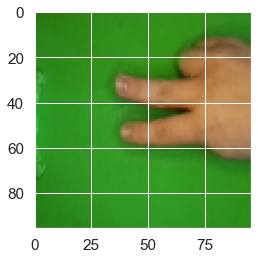

In [89]:
# Show loaded sample
SAMPLE_INDEX = 300
show_image_number(x_test[SAMPLE_INDEX], y_test[SAMPLE_INDEX])

In [90]:
x_train.shape

(1459, 96, 96, 3)

In [91]:
#x_train, y_train = tf.convert.to_tensor(x_train, dtype=tf.float32), tf.convert.to_tensor(y_train, dtype=tf.int8)
#x_test, y_test = tf.convert.to_tensor(x_test, dtype=tf.float32), tf.convert.to_tensor(y_test, dtype=tf.int8)

In [92]:
# Switch the labels into categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [93]:
LEARNING_RATE = 0.001

def define_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(96, 96, 3)),
        tf.keras.layers.Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    model.summary()

    return model

In [94]:
model_adam = define_model(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE))
#model_rms = define_model(optimizer=tf.keras.optimizers.RMSprop(learning_rate=LEARNING_RATE))
#model_sgd = define_model(optimizer=tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 96, 96, 32)        2432      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 48, 48, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 48, 48, 16)        4624      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 24, 24, 16)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 16)        0         
                                                                 
 flatten_12 (Flatten)        (None, 9216)            

In [95]:
with tf.device("/device:GPU:0"):
    history_adam = model_adam.fit(x_train, y_train, epochs=20, batch_size=16, validation_data=(x_test, y_test))

Epoch 1/20
92/92 [==============================] - 1s 11ms/step - loss: 0.4710 - accuracy: 0.8074 - val_loss: 4.5628 - val_accuracy: 0.0000e+00
Epoch 2/20
92/92 [==============================] - 1s 8ms/step - loss: 0.2363 - accuracy: 0.9157 - val_loss: 4.2691 - val_accuracy: 0.0206
Epoch 3/20
92/92 [==============================] - 1s 8ms/step - loss: 0.1469 - accuracy: 0.9472 - val_loss: 2.7588 - val_accuracy: 0.2126
Epoch 4/20
92/92 [==============================] - 1s 8ms/step - loss: 0.0717 - accuracy: 0.9760 - val_loss: 1.8988 - val_accuracy: 0.5117
Epoch 5/20
92/92 [==============================] - 1s 8ms/step - loss: 0.0668 - accuracy: 0.9774 - val_loss: 2.9550 - val_accuracy: 0.3333
Epoch 6/20
92/92 [==============================] - 1s 8ms/step - loss: 0.0372 - accuracy: 0.9890 - val_loss: 4.2640 - val_accuracy: 0.2593
Epoch 7/20
92/92 [==============================] - 1s 8ms/step - loss: 0.0205 - accuracy: 0.9931 - val_loss: 3.0259 - val_accuracy: 0.5075
Epoch 8/20
92/9

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


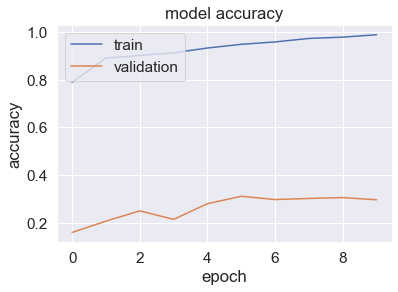

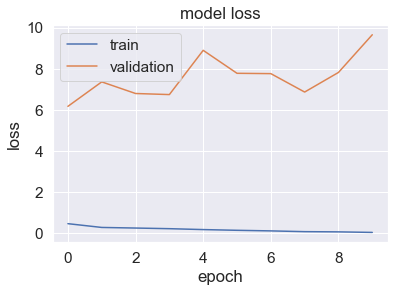

In [50]:
%load_ext autoreload
%autoreload 2


from utilities.script.validation_utils import get_training_plot, get_confusion_matrix, get_classification_report

get_training_plot(history_adam, metric='accuracy')
get_training_plot(history_adam, metric='loss')

35/35 [==============================] - 0s 5ms/step

Confusion Matrix



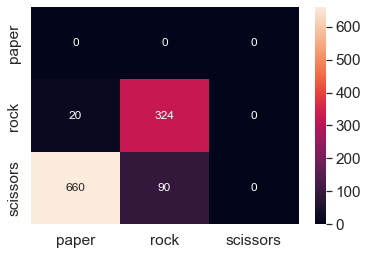

          paper  rock  scissors
paper         0     0         0
rock         20   324         0
scissors    660    90         0


In [51]:
y_pred = model_adam.predict(x_test, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
get_confusion_matrix(y_test, y_pred)

In [52]:
get_classification_report(y_test, y_pred)



Classification Report

              precision    recall  f1-score   support

       paper       0.00      0.00      0.00         0
        rock       0.78      0.94      0.85       344
    scissors       0.00      0.00      0.00       750

    accuracy                           0.30      1094
   macro avg       0.26      0.31      0.28      1094
weighted avg       0.25      0.30      0.27      1094



c:\Users\andro\.conda\envs\sekigahara\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\andro\.conda\envs\sekigahara\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\andro\.conda\envs\sekigahara\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\andro\.conda\en